In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Import the stats librayr from numpy
from scipy import stats, integrate

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
new_style = {'grid': True}
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

# Command so that plots appear in the iPython Notebook
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 12 days
C:\Users\PinupolS\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
#url = http://www.kiplinger.com/tool/college/T014-S001-kiplinger-s-best-values-in-private-colleges/index.php
tf = pd.read_clipboard(header=None)
df = tf
df = df[:100]
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,1,"Princeton University, Princeton",NJ,7%,90%,"$58,660","$42,097",$0,0%,"$6,600","$75,100"
1,2,"Harvard University, Cambridge",MA,6,86,"61,659","44,430","20,827",0�,"15,117","87,200"
2,3,"Vanderbilt University, Nashville",TN,13,88,"61,470","39,953","22,372",20,"20,790","60,900"


In [3]:
df.columns=['Rank','Name','State','Admitrate','4-yr gradrate','Totalcostperyr','Avg need-based aid','Avg non-need-based aid','of non-need-based aid','Avg debt at graduation','Salary yardstick']
df.columns = [x.lower().replace(' ','_') for x in df.columns]
df.head(3)

,rank,name,state,admitrate,4-yr_gradrate,totalcostperyr,avg_need-based_aid,avg_non-need-based_aid,of_non-need-based_aid,avg_debt_at_graduation,salary_yardstick
0,1,"Princeton University, Princeton",NJ,7%,90%,"$58,660","$42,097",$0,0%,"$6,600","$75,100"
1,2,"Harvard University, Cambridge",MA,6,86,"61,659","44,430","20,827",0�,"15,117","87,200"
2,3,"Vanderbilt University, Nashville",TN,13,88,"61,470","39,953","22,372",20,"20,790","60,900"


In [4]:
df.columns

Index([u'rank', u'name', u'state', u'admitrate', u'4-yr_gradrate',
       u'totalcostperyr', u'avg_need-based_aid', u'avg_non-need-based_aid',
       u'of_non-need-based_aid', u'avg_debt_at_graduation',
       u'salary_yardstick'],
      dtype='object')

In [5]:
df['avg_need-based_aid']=df['avg_need-based_aid'].str.replace(',','')
df['avg_need-based_aid'].value_counts()
df['avg_debt_at_graduation']=df['avg_debt_at_graduation'].str.replace(',','')
df['salary_yardstick']=df['salary_yardstick'].str.replace(',','')
df['totalcostperyr']=df['totalcostperyr'].str.replace(',','')
df['totalcostperyr']=df['totalcostperyr'].str.replace('$','')

In [6]:
df['totalcostperyr']=df['totalcostperyr'].str[:5]

In [7]:
for col in df.columns:
    df[col]=df[col].convert_objects(convert_numeric=True)

In [8]:
df.dtypes

rank                        int64
name                       object
state                      object
admitrate                 float64
4-yr_gradrate             float64
totalcostperyr              int64
avg_need-based_aid        float64
avg_non-need-based_aid    float64
of_non-need-based_aid     float64
avg_debt_at_graduation    float64
salary_yardstick          float64
dtype: object

In [9]:
df.state.value_counts().head(5)

NY    13
MA    10
CA     8
PA     6
MO     5
Name: state, dtype: int64

In [10]:
out = pd.cut(df['4-yr_gradrate'], bins = range(10,110,10))
out.value_counts().sort_index()

(10, 20]      0
(20, 30]      3
(30, 40]      2
(40, 50]      8
(50, 60]     16
(60, 70]     24
(70, 80]     22
(80, 90]     23
(90, 100]     1
dtype: int64

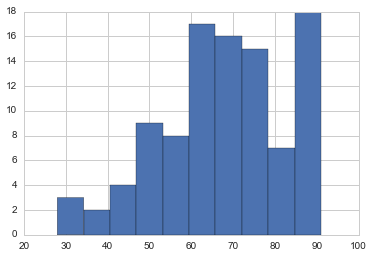

In [11]:
df['4-yr_gradrate'].hist(bins=10)

In [12]:
df.describe()

,rank,admitrate,4-yr_gradrate,totalcostperyr,avg_need-based_aid,avg_non-need-based_aid,of_non-need-based_aid,avg_debt_at_graduation,salary_yardstick
count,100.000000,99.000000,99.000000,100.000000,99.000000,8.000000,96.000000,99.000000,99.000000
mean,50.500000,49.191919,67.757576,54353.600000,24441.919192,62.500000,41.593750,28906.252525,56860.606061
std,29.011492,23.463683,14.980321,9661.340225,9899.824129,176.776695,26.800463,5788.353748,12614.753415
min,1.000000,5.000000,28.000000,18622.000000,3209.000000,0.000000,0.000000,12104.000000,32200.000000
25%,25.750000,34.500000,59.000000,47457.500000,16904.500000,0.000000,20.000000,26000.000000,46550.000000
50%,50.500000,51.000000,69.000000,58004.500000,23155.000000,0.000000,41.500000,29187.000000,55600.000000
75%,75.250000,68.000000,79.000000,62693.750000,31466.000000,0.000000,64.250000,33162.500000,66050.000000
max,100.000000,95.000000,91.000000,66400.000000,45710.000000,500.000000,98.000000,41814.000000,91600.000000


In [13]:
df.corr()

,rank,admitrate,4-yr_gradrate,totalcostperyr,avg_need-based_aid,avg_non-need-based_aid,of_non-need-based_aid,avg_debt_at_graduation,salary_yardstick
rank,1.000000,0.744628,-0.615147,-0.427379,-0.674005,0.710329,0.531802,0.632313,-0.594089
admitrate,0.744628,1.000000,-0.610265,-0.682422,-0.747229,0.529253,0.680979,0.535297,-0.713391
4-yr_gradrate,-0.615147,-0.610265,1.000000,0.714318,0.721858,0.176227,-0.572202,-0.306824,0.526830
totalcostperyr,-0.427379,-0.682422,0.714318,1.000000,0.764948,0.392053,-0.472805,-0.173897,0.692243
avg_need-based_aid,-0.674005,-0.747229,0.721858,0.764948,1.000000,-0.269096,-0.525087,-0.423055,0.681809
avg_non-need-based_aid,0.710329,0.529253,0.176227,0.392053,-0.269096,1.000000,1.000000,0.618631,-0.316908
of_non-need-based_aid,0.531802,0.680979,-0.572202,-0.472805,-0.525087,1.000000,1.000000,0.415575,-0.494626
avg_debt_at_graduation,0.632313,0.535297,-0.306824,-0.173897,-0.423055,0.618631,0.415575,1.000000,-0.340863
salary_yardstick,-0.594089,-0.713391,0.526830,0.692243,0.681809,-0.316908,-0.494626,-0.340863,1.000000


In [14]:
df = df.fillna(0)
df.head(5)

,rank,name,state,admitrate,4-yr_gradrate,totalcostperyr,avg_need-based_aid,avg_non-need-based_aid,of_non-need-based_aid,avg_debt_at_graduation,salary_yardstick
0,1,"Princeton University, Princeton",NJ,0,0,58660,0,0,0,0,0
1,2,"Harvard University, Cambridge",MA,6,86,61659,44430,0,0,15117,87200
2,3,"Vanderbilt University, Nashville",TN,13,88,61470,39953,0,20,20790,60900
3,4,"Rice University, Houston",TX,15,82,56703,34954,0,21,22241,59900
4,5,"Yale University, New Haven",CT,6,87,63250,45710,0,0,14853,66000


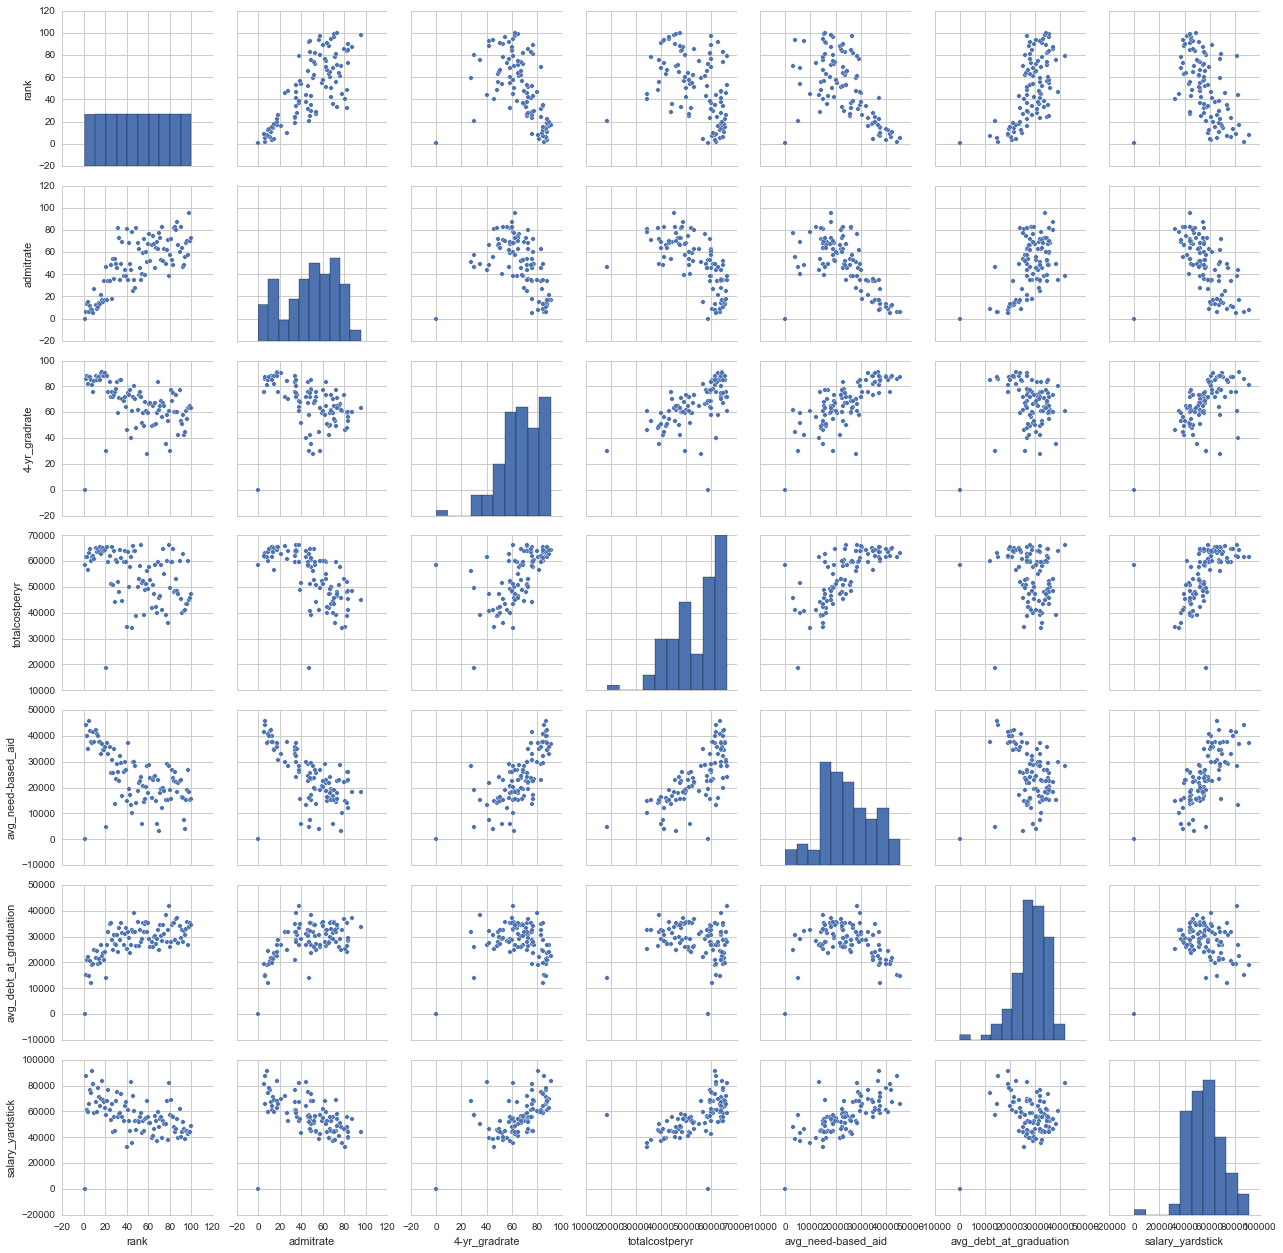

In [15]:
sns.pairplot(df[['rank','admitrate','4-yr_gradrate','totalcostperyr','avg_need-based_aid','avg_debt_at_graduation','salary_yardstick']]);

In [16]:
c = df.corr().abs()

In [17]:
c

,rank,admitrate,4-yr_gradrate,totalcostperyr,avg_need-based_aid,avg_non-need-based_aid,of_non-need-based_aid,avg_debt_at_graduation,salary_yardstick
rank,1.000000,0.753260,0.480290,0.427379,0.602867,0.099229,0.575327,0.633978,0.461927
admitrate,0.753260,1.000000,0.458280,0.676365,0.659990,0.134214,0.714093,0.560630,0.550764
4-yr_gradrate,0.480290,0.458280,1.000000,0.630982,0.737470,0.129067,0.469179,0.063983,0.607639
totalcostperyr,0.427379,0.676365,0.630982,1.000000,0.730834,0.114529,0.490612,0.175458,0.611333
avg_need-based_aid,0.602867,0.659990,0.737470,0.730834,1.000000,0.128890,0.506009,0.258929,0.702155
avg_non-need-based_aid,0.099229,0.134214,0.129067,0.114529,0.128890,1.000000,0.135639,0.031370,0.084363
of_non-need-based_aid,0.575327,0.714093,0.469179,0.490612,0.506009,0.135639,1.000000,0.469563,0.411218
avg_debt_at_graduation,0.633978,0.560630,0.063983,0.175458,0.258929,0.031370,0.469563,1.000000,0.092374
salary_yardstick,0.461927,0.550764,0.607639,0.611333,0.702155,0.084363,0.411218,0.092374,1.000000


In [18]:
s = c.unstack()
so = s.order(kind="quicksort")

In [19]:
so[(so > 0.69) & (so < 0.9)].sort_values(ascending=False).drop_duplicates()

rank                   admitrate             0.753260
4-yr_gradrate          avg_need-based_aid    0.737470
totalcostperyr         avg_need-based_aid    0.730834
of_non-need-based_aid  admitrate             0.714093
avg_need-based_aid     salary_yardstick      0.702155
dtype: float64

In [20]:
so[(so < 0.4)].sort_values(ascending=True).drop_duplicates()

avg_debt_at_graduation  avg_non-need-based_aid    0.031370
4-yr_gradrate           avg_debt_at_graduation    0.063983
avg_non-need-based_aid  salary_yardstick          0.084363
salary_yardstick        avg_debt_at_graduation    0.092374
avg_non-need-based_aid  rank                      0.099229
totalcostperyr          avg_non-need-based_aid    0.114529
avg_need-based_aid      avg_non-need-based_aid    0.128890
4-yr_gradrate           avg_non-need-based_aid    0.129067
admitrate               avg_non-need-based_aid    0.134214
avg_non-need-based_aid  of_non-need-based_aid     0.135639
avg_debt_at_graduation  totalcostperyr            0.175458
avg_need-based_aid      avg_debt_at_graduation    0.258929
dtype: float64

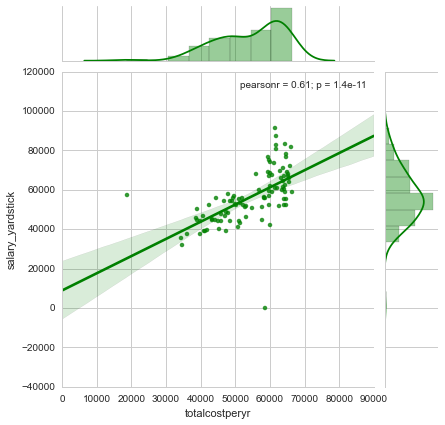

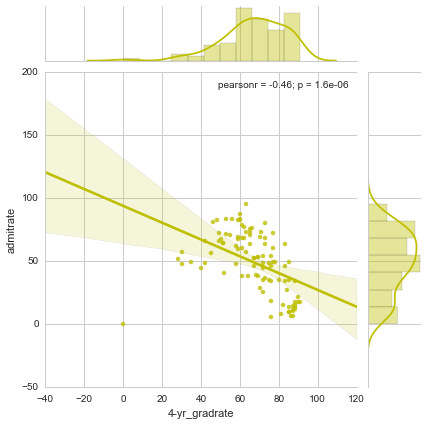

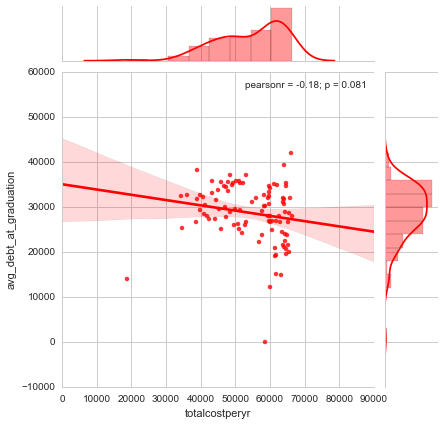

In [21]:
sns.jointplot(x="totalcostperyr", y="salary_yardstick", data=df, kind = "reg",color='g');
sns.jointplot(x="4-yr_gradrate", y="admitrate", data=df, kind = "reg",color='y');
sns.jointplot(x="totalcostperyr", y="avg_debt_at_graduation", data=df, kind = "reg",color='r');